# Exploratory Data Analysis
## Banking Dataset

#### Importing neccessary libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Loading and displaying the dataset

In [6]:
df = pd.read_csv("/Users/charikajangili/Downloads/new_train.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


#### Gathering some basic information about the dataset

In [4]:
df.shape

(32950, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [6]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

#### Checking for missing values

In [7]:
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

##### No missing values in the dataset.

### Univariate analysis of categorical variables

In [21]:
cat_var = df.select_dtypes(include = "object").columns

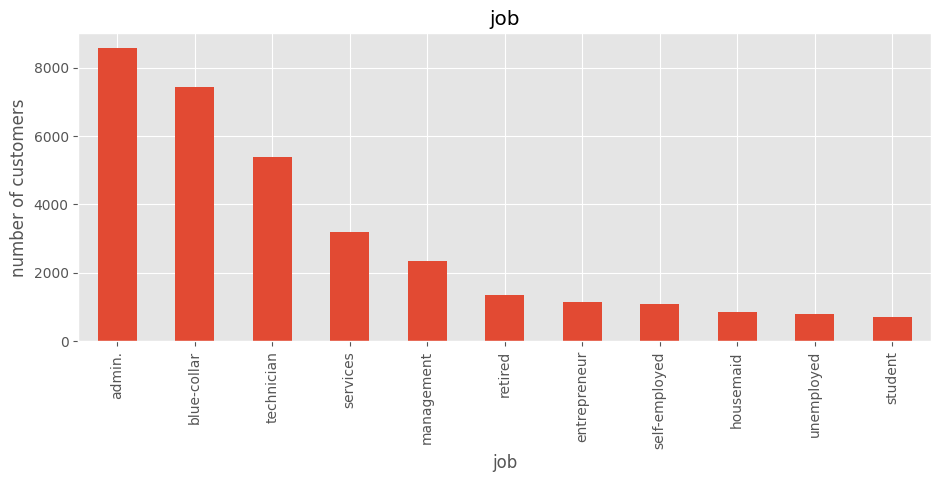

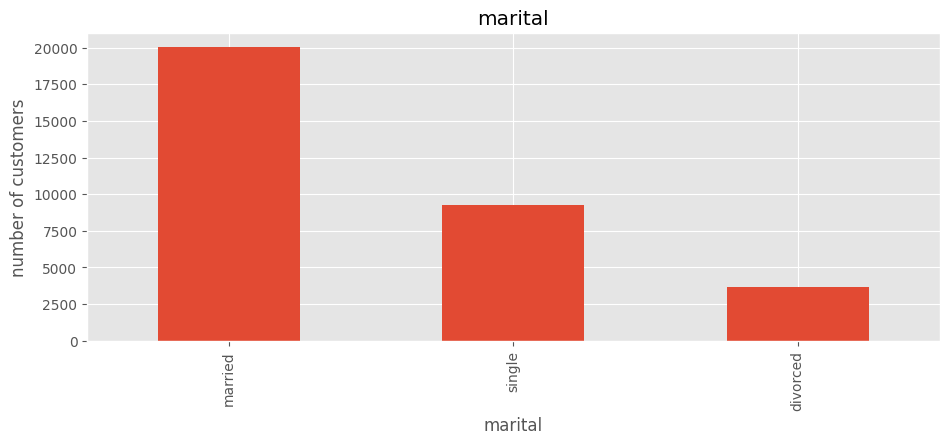

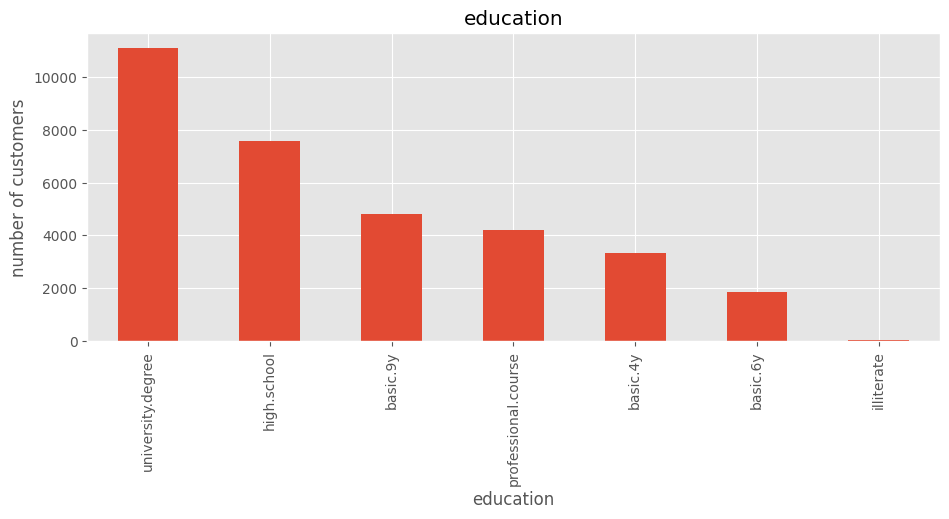

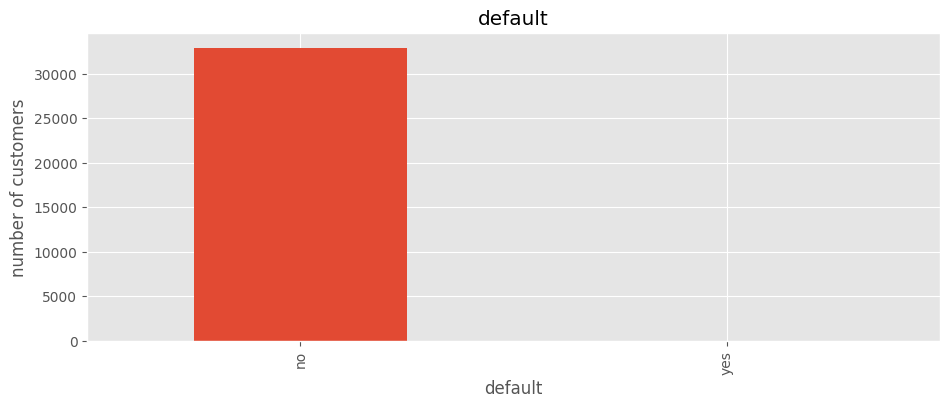

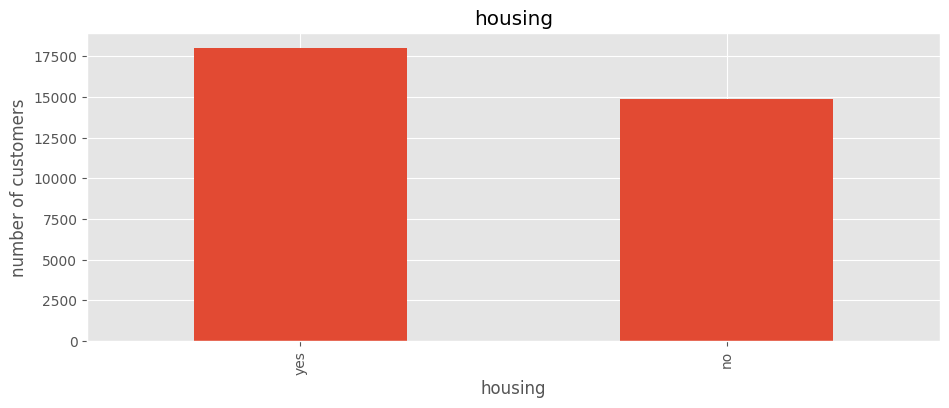

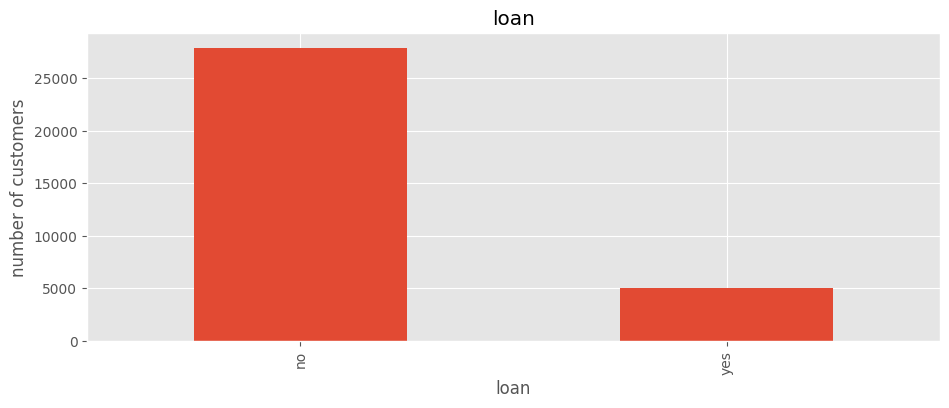

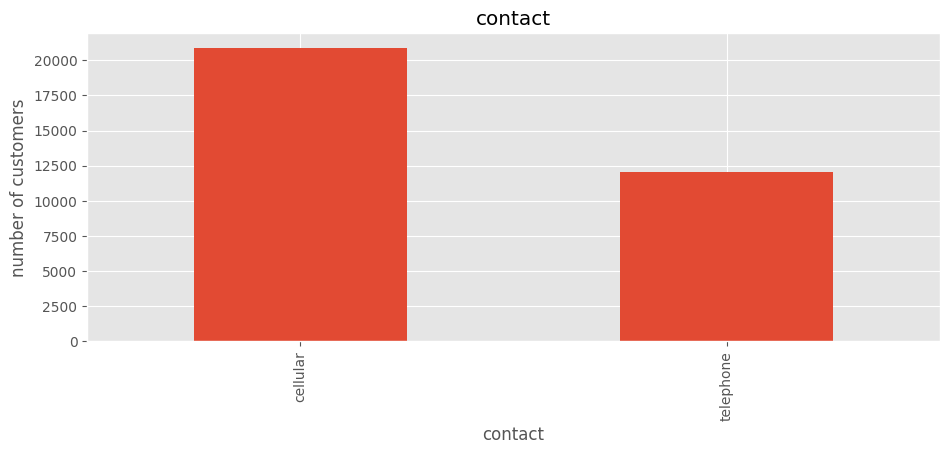

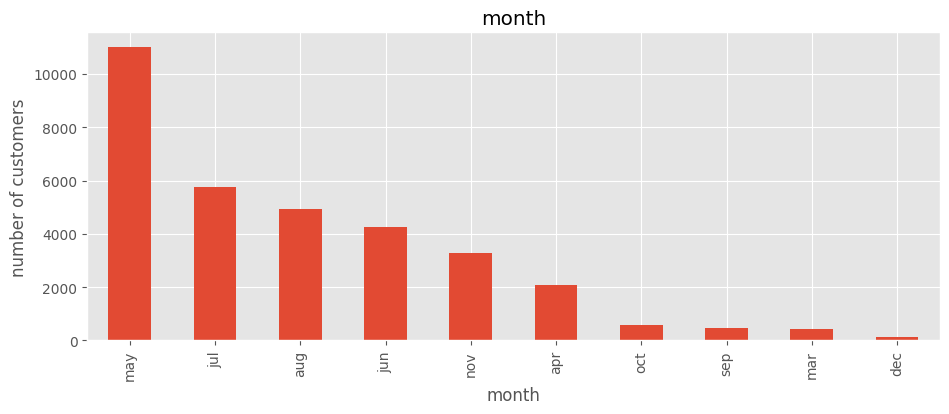

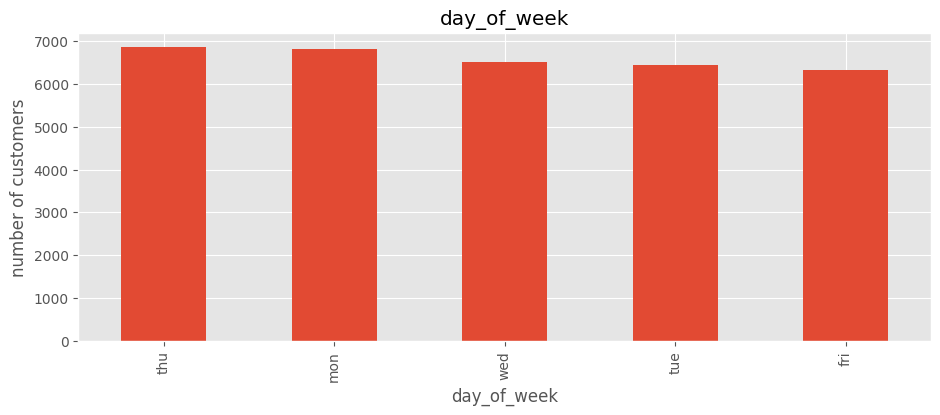

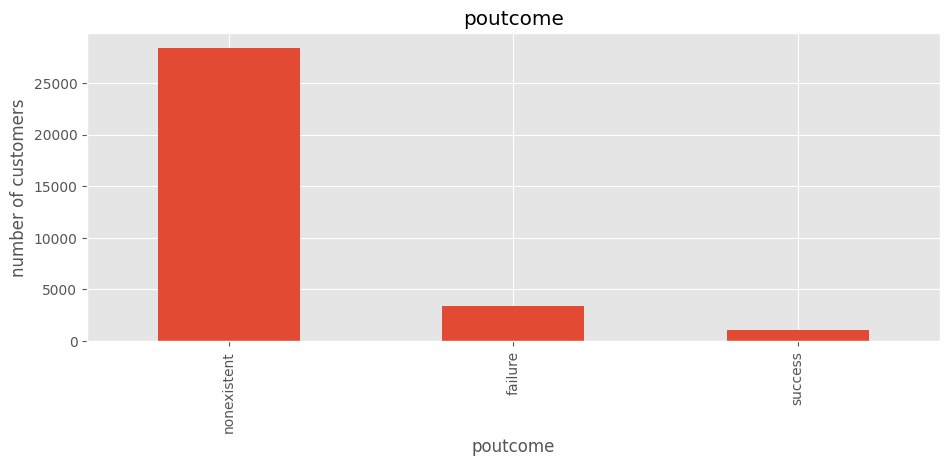

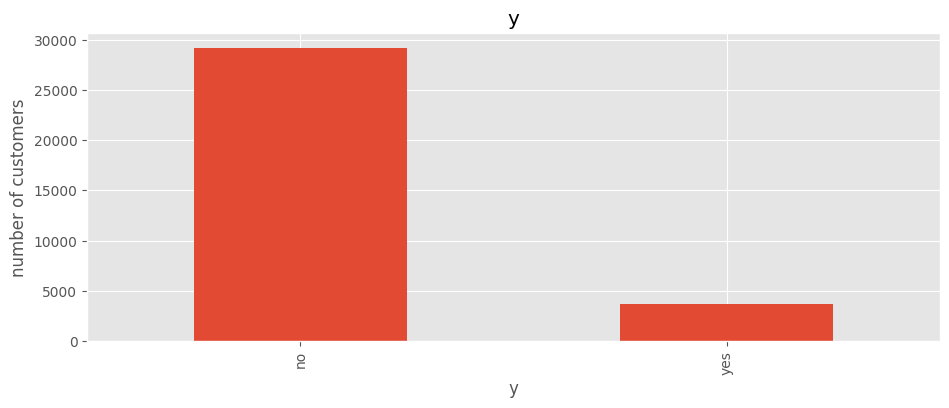

In [34]:
plt.style.use("ggplot")

for column in cat_var:
    plt.figure()
    df[column].value_counts().plot(kind="bar", figsize=(11,4))
    plt.xlabel(column)
    plt.ylabel("number of customers")
    plt.title(column)

### Observations
- Most of the customers are administrators, blue collar works, or technicians
- More than half of our customers are married, and the rest are either single or divorced
- Many of our customers have at least a high school diploma, with a university degree being the highest number of customers
- Many of our past customers have applied for a housing loan but very few have applied for personal loans
- Cell-phones seem to be the most favoured method of reaching out to customers
- Many customers have been contacted in the month of May
- The plot for the target variable ("y") shows heavy imbalance in the target variable
- The "unknown" category seems to be the way the dataset stores missing values

#### Replacing the missing values ("uknown") with the mode
To preserve the distribution of the current data, the "unknown" values will be filled the mode. This works because the mode is the majority value in the dataset.

In [28]:
for column in cat_var:
    mode = df[column].mode()[0]
    df[column] = df[column].replace("unknown", mode)

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,no,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


### Univariate analysis of numerical variables

In [35]:
num_var = df.select_dtypes(include = "int64").columns
num_var.tolist()


['age', 'duration', 'campaign', 'pdays', 'previous']

#### Plotting histograms for numerical columns

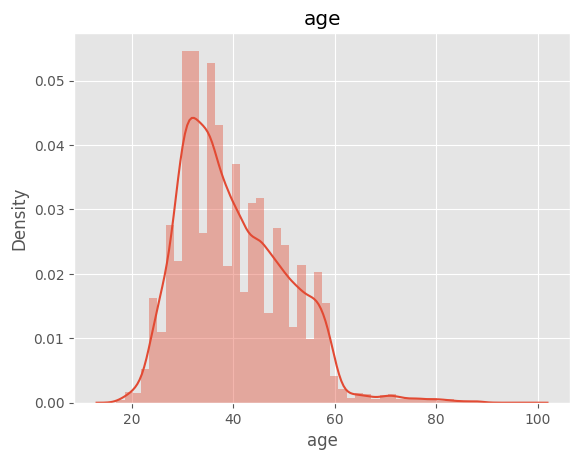

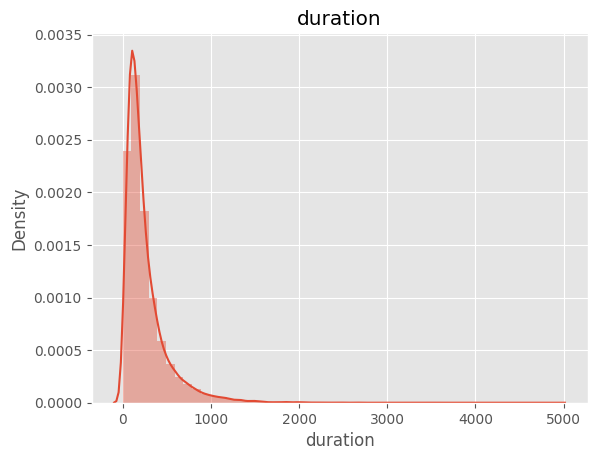

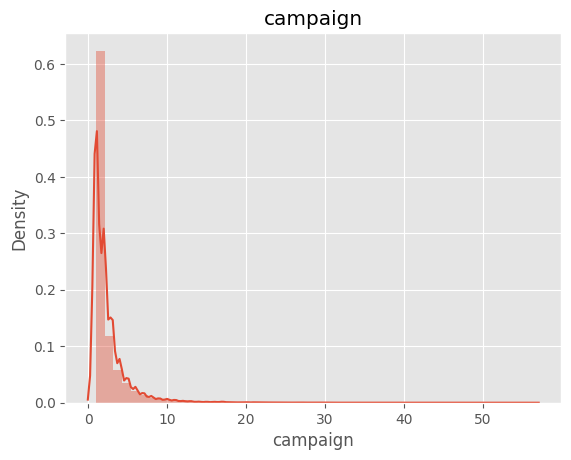

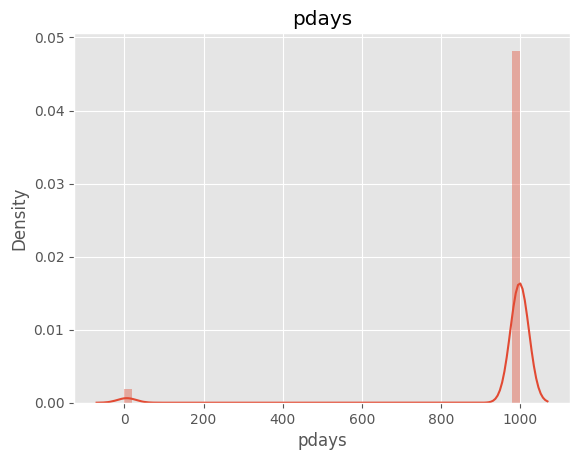

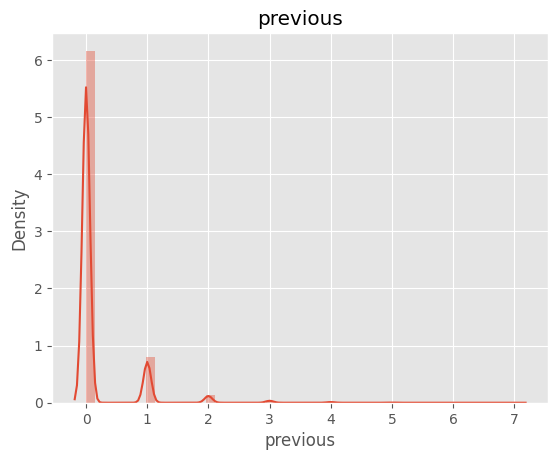

In [38]:
plt.style.use("ggplot")

for column in num_var:
    plt.figure()
    sns.distplot(df[column], kde=True)
    plt.title(column)


#### Plotting boxplots for numerical columns

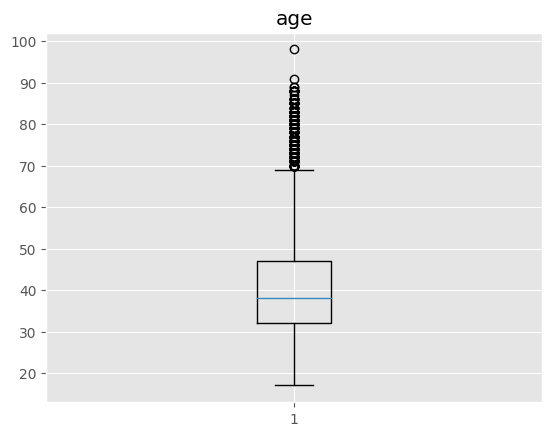

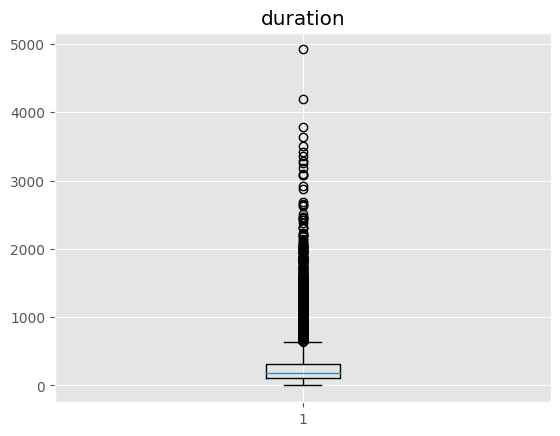

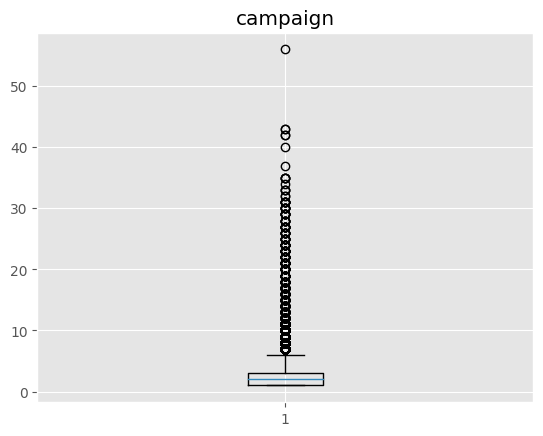

In [40]:
for column in ["age", "duration", "campaign"]:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(column)
    plt.show()

### Observations
- As we can see from the histograms, the features age, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features.
- Looking at the plot for pdays, we can infer that majority of the customers were being contacted for the first time because as per the feature description. For pdays the value 999 indicates that the customer had not been contacted previously.

Since pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [9]:
df.drop(columns=["pdays", "previous"], axis = 1, inplace = True)